## **Preparing the environment and loading the data**

In [1]:
import numpy as np
import pandas as pd

from classes import Helper, Purchase_Probabilities

In [2]:
DATA_PATH = '/Users/leonhagel/Documents/coding/github/mlim-g2/data/'
EXPORT_PATH = '/Users/leonhagel/Documents/coding/github/mlim-g2/export/'

In [3]:
files = {
    'data': [
        DATA_PATH + 'baskets.parquet',
        DATA_PATH + 'coupon_index.parquet', 
        DATA_PATH + 'coupons.parquet', 
        DATA_PATH + 'merged.parquet',
        DATA_PATH + 'clean.parquet', 
        DATA_PATH + 'purchase.parquet'
    ], 
    'mappings': [
        EXPORT_PATH + 'product_histories.parquet',
        EXPORT_PATH + 'prices.parquet',
    ]
}

In [4]:
purchase = Purchase_Probabilities()
purchase.load(files)

# reduce file sizes
for name, df in purchase.data.items():
    purchase.data[name] = purchase.reduce_data_size(purchase.data[name])

In [7]:
df = purchase.data['purchase'].copy()
df

,shopper,week,product,price,discount,purchased,weeks_since_last_purchase,trend_1,trend_3,trend_5,product_freq
0,0,85,0,688.0,0.0,0.0,104.0,0.0,0.000000,0.0,0.000000
1,0,85,1,560.0,0.0,0.0,104.0,0.0,0.000000,0.0,0.000000
2,0,85,2,773.0,0.0,0.0,104.0,0.0,0.000000,0.0,0.000000
3,0,85,3,722.0,0.0,0.0,104.0,0.0,0.000000,0.0,0.000000
4,0,85,4,620.0,0.0,0.0,15.0,0.0,0.000000,0.0,0.094118
...,...,...,...,...,...,...,...,...,...,...,...
2999995,1999,90,245,549.0,0.0,0.0,1.0,1.0,0.333333,0.2,0.133333
2999996,1999,90,246,702.0,0.0,0.0,104.0,0.0,0.000000,0.0,0.000000
2999997,1999,90,247,670.0,0.0,0.0,104.0,0.0,0.000000,0.0,0.000000
2999998,1999,90,248,490.0,0.0,0.0,104.0,0.0,0.000000,0.0,0.000000


In [8]:
df.loc[df['discount'] != 0, :].describe()

,shopper,week,product,price,discount,purchased,weeks_since_last_purchase,trend_1,trend_3,trend_5,product_freq
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,999.500000,87.000000,124.934500,606.405518,0.249981,0.058940,80.844261,0.029660,0.030060,0.029896,0.030054
std,577.355971,1.414228,72.334087,96.889725,0.100073,0.235515,38.962158,0.169649,0.120485,0.108676,0.091308
min,0.000000,85.000000,0.000000,389.333344,0.100000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,499.750000,86.000000,62.000000,527.500000,0.150000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000
50%,999.500000,87.000000,125.000000,605.000000,0.250000,0.000000,104.000000,0.000000,0.000000,0.000000,0.000000
75%,1499.250000,88.000000,188.000000,681.000000,0.350000,0.000000,104.000000,0.000000,0.000000,0.000000,0.011494
max,1999.000000,89.000000,249.000000,837.647034,0.400000,1.000000,104.000000,1.000000,1.000000,1.000000,1.000000


<br>

## **Training the model**

In [9]:
X_train, y_train, X_test, y_test = purchase.train_test_split(89, 4)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_train.head()

(2000000, 9) (2000000,) (500000, 9) (500000,)


,price,discount,weeks_since_last_purchase,trend_1,trend_3,trend_5,product_freq,shopper_WOE,product_WOE
0,688.0,0.0,104.0,0.0,0.0,0.0,0.000000,0.039796,-0.541070
1,560.0,0.0,104.0,0.0,0.0,0.0,0.000000,0.039796,0.638078
2,773.0,0.0,104.0,0.0,0.0,0.0,0.000000,0.039796,-0.776683
3,722.0,0.0,104.0,0.0,0.0,0.0,0.000000,0.039796,-1.401178
4,620.0,0.0,15.0,0.0,0.0,0.0,0.094118,0.039796,-0.128700


In [10]:
df.loc[X_test.index, :]

,shopper,week,product,price,discount,purchased,weeks_since_last_purchase,trend_1,trend_3,trend_5,product_freq
1000,0,89,0,688.0,0.0,0.0,104.0,0.0,0.0,0.0,0.000000
1001,0,89,1,560.0,0.0,0.0,104.0,0.0,0.0,0.0,0.000000
1002,0,89,2,773.0,0.0,0.0,104.0,0.0,0.0,0.0,0.000000
1003,0,89,3,722.0,0.0,0.0,104.0,0.0,0.0,0.0,0.000000
1004,0,89,4,620.0,0.0,0.0,19.0,0.0,0.0,0.0,0.089888
...,...,...,...,...,...,...,...,...,...,...,...
2999745,1999,89,245,549.0,0.0,1.0,19.0,0.0,0.0,0.0,0.123596
2999746,1999,89,246,702.0,0.3,0.0,104.0,0.0,0.0,0.0,0.000000
2999747,1999,89,247,670.0,0.0,0.0,104.0,0.0,0.0,0.0,0.000000
2999748,1999,89,248,490.0,0.0,0.0,104.0,0.0,0.0,0.0,0.000000


In [13]:
X_test

,price,discount,weeks_since_last_purchase,trend_1,trend_3,trend_5,product_freq,shopper_WOE,product_WOE
1000,688.0,0.0,104.0,0.0,0.0,0.0,0.000000,0.039796,-0.541070
1001,560.0,0.0,104.0,0.0,0.0,0.0,0.000000,0.039796,0.638078
1002,773.0,0.0,104.0,0.0,0.0,0.0,0.000000,0.039796,-0.776683
1003,722.0,0.0,104.0,0.0,0.0,0.0,0.000000,0.039796,-1.401178
1004,620.0,0.0,19.0,0.0,0.0,0.0,0.089888,0.039796,-0.128700
...,...,...,...,...,...,...,...,...,...
2999745,549.0,0.0,19.0,0.0,0.0,0.0,0.123596,0.071599,-0.878618
2999746,702.0,0.3,104.0,0.0,0.0,0.0,0.000000,0.071599,-0.343367
2999747,670.0,0.0,104.0,0.0,0.0,0.0,0.000000,0.071599,-1.559153
2999748,490.0,0.0,104.0,0.0,0.0,0.0,0.000000,0.071599,0.837201


<AxesSubplot:>

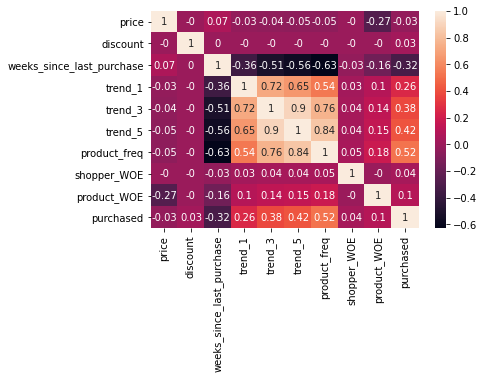

In [18]:
import seaborn as sns
sns.heatmap(X_train.join(y_train).corr().round(2), annot=True)

In [14]:
model = purchase.fit('lgbm', X_train, y_train)

In [15]:
y_hat = {}

In [16]:
y_hat['train'] = purchase.predict(model, X_train)
y_hat['test'] = purchase.predict(model, X_test)

In [17]:
scores = {}
scores['train'] = purchase.score(y_train, y_hat['train'])
scores['test'] = purchase.score(y_test, y_hat['test'])
scores

{'train': 0.07631113321309001, 'test': 0.07679777761445356}

### **Predicting purchase probabilities**

In [19]:
X_train, y_train, X, _ = purchase.train_test_split(90, 5)
model = purchase.fit('lgbm', X_train, y_train)
purchase.score(y_train, purchase.predict(model, X_train))

0.07634308591855887

In [20]:
X_train.describe().round(2)

,price,discount,weeks_since_last_purchase,trend_1,trend_3,trend_5,product_freq,shopper_WOE,product_WOE
count,2500000.00,2500000.00,2500000.00,2500000.00,2500000.00,2500000.00,2500000.00,2500000.00,2500000.00
mean,606.68,0.00,80.82,0.03,0.03,0.03,0.03,0.00,-0.18
std,96.96,0.04,38.99,0.17,0.12,0.11,0.09,0.21,0.65
min,389.33,0.00,1.00,0.00,0.00,0.00,0.00,-0.89,-1.97
25%,528.00,0.00,58.00,0.00,0.00,0.00,0.00,-0.12,-0.56
50%,605.85,0.00,104.00,0.00,0.00,0.00,0.00,0.02,-0.14
75%,681.00,0.00,104.00,0.00,0.00,0.00,0.01,0.14,0.28
max,837.65,0.40,104.00,1.00,1.00,1.00,1.00,0.56,1.35


In [21]:
X_train['discount'].value_counts()

0.00    2450000
0.30       7208
0.40       7193
0.10       7171
0.25       7169
0.15       7145
0.20       7077
0.35       7037
Name: discount, dtype: int64

In [22]:
X.describe().round(2)

,price,discount,weeks_since_last_purchase,trend_1,trend_3,trend_5,product_freq,shopper_WOE,product_WOE
count,500000.00,500000.0,500000.00,500000.00,500000.00,500000.00,500000.00,500000.00,500000.00
mean,606.68,0.0,80.78,0.03,0.03,0.03,0.03,0.00,-0.18
std,96.96,0.0,38.99,0.17,0.12,0.11,0.09,0.21,0.65
min,390.00,0.0,1.00,0.00,0.00,0.00,0.00,-0.89,-1.97
25%,528.00,0.0,58.00,0.00,0.00,0.00,0.00,-0.12,-0.56
50%,606.00,0.0,104.00,0.00,0.00,0.00,0.00,0.02,-0.14
75%,681.00,0.0,104.00,0.00,0.00,0.00,0.01,0.14,0.28
max,837.00,0.0,104.00,1.00,1.00,1.00,1.00,0.56,1.35


In [23]:
df.loc[X.index,:]

,shopper,week,product,price,discount,purchased,weeks_since_last_purchase,trend_1,trend_3,trend_5,product_freq
1250,0,90,0,688.0,0.0,0.0,104.0,0.0,0.000000,0.0,0.000000
1251,0,90,1,560.0,0.0,0.0,104.0,0.0,0.000000,0.0,0.000000
1252,0,90,2,773.0,0.0,0.0,104.0,0.0,0.000000,0.0,0.000000
1253,0,90,3,722.0,0.0,0.0,104.0,0.0,0.000000,0.0,0.000000
1254,0,90,4,620.0,0.0,0.0,20.0,0.0,0.000000,0.0,0.088889
...,...,...,...,...,...,...,...,...,...,...,...
2999995,1999,90,245,549.0,0.0,0.0,1.0,1.0,0.333333,0.2,0.133333
2999996,1999,90,246,702.0,0.0,0.0,104.0,0.0,0.000000,0.0,0.000000
2999997,1999,90,247,670.0,0.0,0.0,104.0,0.0,0.000000,0.0,0.000000
2999998,1999,90,248,490.0,0.0,0.0,104.0,0.0,0.000000,0.0,0.000000


In [24]:
discounts = [0.15, 0.2, 0.25, 0.3]

template = X.copy()
for discount in discounts:
    template['discount'] = discount
    X = X.append(template)
X

,price,discount,weeks_since_last_purchase,trend_1,trend_3,trend_5,product_freq,shopper_WOE,product_WOE
1250,688.0,0.0,104.0,0.0,0.000000,0.0,0.000000,0.092952,-0.597974
1251,560.0,0.0,104.0,0.0,0.000000,0.0,0.000000,0.092952,0.619174
1252,773.0,0.0,104.0,0.0,0.000000,0.0,0.000000,0.092952,-0.751643
1253,722.0,0.0,104.0,0.0,0.000000,0.0,0.000000,0.092952,-1.418521
1254,620.0,0.0,20.0,0.0,0.000000,0.0,0.088889,0.092952,-0.123509
...,...,...,...,...,...,...,...,...,...
2999995,549.0,0.3,1.0,1.0,0.333333,0.2,0.133333,0.187235,-0.808414
2999996,702.0,0.3,104.0,0.0,0.000000,0.0,0.000000,0.187235,-0.286676
2999997,670.0,0.3,104.0,0.0,0.000000,0.0,0.000000,0.187235,-1.591580
2999998,490.0,0.3,104.0,0.0,0.000000,0.0,0.000000,0.187235,0.805243


In [25]:
X.describe().round(2)

,price,discount,weeks_since_last_purchase,trend_1,trend_3,trend_5,product_freq,shopper_WOE,product_WOE
count,2500000.00,2500000.00,2500000.00,2500000.00,2500000.00,2500000.00,2500000.00,2500000.00,2500000.00
mean,606.68,0.18,80.78,0.03,0.03,0.03,0.03,0.00,-0.18
std,96.96,0.10,38.99,0.17,0.12,0.11,0.09,0.21,0.65
min,390.00,0.00,1.00,0.00,0.00,0.00,0.00,-0.89,-1.97
25%,528.00,0.15,58.00,0.00,0.00,0.00,0.00,-0.12,-0.56
50%,606.00,0.20,104.00,0.00,0.00,0.00,0.00,0.02,-0.14
75%,681.00,0.25,104.00,0.00,0.00,0.00,0.01,0.14,0.28
max,837.00,0.30,104.00,1.00,1.00,1.00,1.00,0.56,1.35


In [26]:
revenue = df.loc[X.index, ['shopper', 'week', 'product', 'price']].copy()
revenue['discount'] = X['discount'].copy()
revenue

,shopper,week,product,price,discount
1250,0,90,0,688.0,0.0
1251,0,90,1,560.0,0.0
1252,0,90,2,773.0,0.0
1253,0,90,3,722.0,0.0
1254,0,90,4,620.0,0.0
...,...,...,...,...,...
2999995,1999,90,245,549.0,0.3
2999996,1999,90,246,702.0,0.3
2999997,1999,90,247,670.0,0.3
2999998,1999,90,248,490.0,0.3


In [27]:
revenue['discount'].value_counts()

0.00    500000
0.15    500000
0.25    500000
0.30    500000
0.20    500000
Name: discount, dtype: int64

In [28]:
revenue['probabilities'] = purchase.predict(model, X)
revenue

,shopper,week,product,price,discount,probabilities
1250,0,90,0,688.0,0.0,0.001121
1251,0,90,1,560.0,0.0,0.001404
1252,0,90,2,773.0,0.0,0.001043
1253,0,90,3,722.0,0.0,0.001072
1254,0,90,4,620.0,0.0,0.097473
...,...,...,...,...,...,...
2999995,1999,90,245,549.0,0.3,0.257259
2999996,1999,90,246,702.0,0.3,0.005150
2999997,1999,90,247,670.0,0.3,0.002378
2999998,1999,90,248,490.0,0.3,0.008984


In [29]:
revenue['exp_revenue'] = revenue['probabilities'] * revenue['price'] * (1 - revenue['discount'])
revenue

,shopper,week,product,price,discount,probabilities,exp_revenue
1250,0,90,0,688.0,0.0,0.001121,0.771192
1251,0,90,1,560.0,0.0,0.001404,0.786432
1252,0,90,2,773.0,0.0,0.001043,0.806533
1253,0,90,3,722.0,0.0,0.001072,0.773921
1254,0,90,4,620.0,0.0,0.097473,60.433005
...,...,...,...,...,...,...,...
2999995,1999,90,245,549.0,0.3,0.257259,98.864802
2999996,1999,90,246,702.0,0.3,0.005150,2.530532
2999997,1999,90,247,670.0,0.3,0.002378,1.115259
2999998,1999,90,248,490.0,0.3,0.008984,3.081368


In [33]:
discounts = revenue['discount'].unique()
revenue['d_revenue'] = None

for discount in discounts:
    revenue.loc[revenue['discount'] == discount, 'd_revenue'] = revenue.loc[revenue['discount'] == discount, 'exp_revenue'] - revenue.loc[revenue['discount'] == 0, 'exp_revenue']
revenue

,shopper,week,product,price,discount,probabilities,exp_revenue,d_revenue
1250,0,90,0,688.0,0.0,0.001121,0.771192,0.000000
1251,0,90,1,560.0,0.0,0.001404,0.786432,0.000000
1252,0,90,2,773.0,0.0,0.001043,0.806533,0.000000
1253,0,90,3,722.0,0.0,0.001072,0.773921,0.000000
1254,0,90,4,620.0,0.0,0.097473,60.433005,0.000000
...,...,...,...,...,...,...,...,...
2999995,1999,90,245,549.0,0.3,0.257259,98.864802,39.414997
2999996,1999,90,246,702.0,0.3,0.005150,2.530532,1.733721
2999997,1999,90,247,670.0,0.3,0.002378,1.115259,0.800586
2999998,1999,90,248,490.0,0.3,0.008984,3.081368,2.216264


In [97]:
revenue.sort_values(by='d_revenue', ascending=False)

,shopper,week,product,price,discount,probabilities,exp_revenue,d_revenue
2177854,1451,90,104,637.0,0.3,0.630816,281.280830,254.982726
2996860,1997,90,110,646.0,0.3,0.534007,241.477979,231.178751
2188301,1458,90,51,640.0,0.3,0.460981,206.519439,193.223776
2137333,1424,90,83,637.0,0.3,0.437682,195.162537,183.949723
2674324,1782,90,74,779.0,0.3,0.492133,268.360141,175.561162
...,...,...,...,...,...,...,...,...
2554310,1702,90,60,795.0,0.3,0.967633,538.487851,-209.463666
913310,608,90,60,795.0,0.3,0.967633,538.487851,-209.463666
781310,520,90,60,795.0,0.3,0.967633,538.487851,-209.463666
2333810,1555,90,60,795.0,0.3,0.967633,538.487851,-209.463666


In [106]:
def get_top_coupons(df, shopper, n_discounts):
    df = df.loc[df['shopper']==shopper, :].sort_values(by='d_revenue', ascending=False).copy()
    df = df.loc[df['discount'] != 0, :]
    output = pd.DataFrame(df.iloc[0]).T
    i=1
    while output.shape[0] < n_discounts:
        row = df.iloc[i]
        if np.logical_not(np.isin(row['product'], output['product'])):
            output = output.append(row)
        i += 1

    return output

In [107]:
coupons = {shopper: get_top_coupons(revenue, shopper, 5) for shopper in range(2000)}

In [108]:
output = list(coupons.values())[0]
output['coupon'] = range(5)

for coupon in list(coupons.values())[1:]:
    coupon['coupon'] = range(5)
    output = output.append(coupon)
    
output = output[['shopper', 'week', 'coupon', 'product', 'discount']]
output

,shopper,week,coupon,product,discount
1317,0,90,0,67,0.20
1417,0,90,1,167,0.15
1494,0,90,2,244,0.25
1302,0,90,3,52,0.25
1254,0,90,4,4,0.25
...,...,...,...,...,...
2999781,1999,90,0,31,0.15
2999803,1999,90,1,53,0.25
2999927,1999,90,2,177,0.25
2999791,1999,90,3,41,0.30


<br>

### **Evaluation**

<AxesSubplot:>

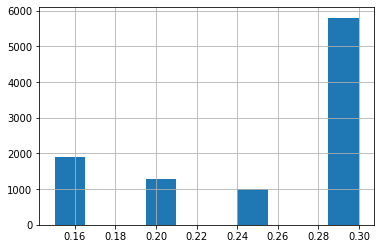

In [113]:
# discount distributions
output['discount'].hist()

In [110]:
np.logical_not(np.isin(row['product'], discounts[shopper]['product']))

False

In [128]:
X

,price,discount,weeks_since_last_purchase,trend_1,trend_3,trend_5,product_freq,shopper_WOE,product_WOE
1250,688.0,0.0,104.0,0.0,0.000000,0.0,0.000000,0.092952,-0.597974
1251,560.0,0.0,104.0,0.0,0.000000,0.0,0.000000,0.092952,0.619174
1252,773.0,0.0,104.0,0.0,0.000000,0.0,0.000000,0.092952,-0.751643
1253,722.0,0.0,104.0,0.0,0.000000,0.0,0.000000,0.092952,-1.418521
1254,620.0,0.0,20.0,0.0,0.000000,0.0,0.088889,0.092952,-0.123509
...,...,...,...,...,...,...,...,...,...
2999995,549.0,0.3,1.0,1.0,0.333333,0.2,0.133333,0.187235,-0.808414
2999996,702.0,0.3,104.0,0.0,0.000000,0.0,0.000000,0.187235,-0.286676
2999997,670.0,0.3,104.0,0.0,0.000000,0.0,0.000000,0.187235,-1.591580
2999998,490.0,0.3,104.0,0.0,0.000000,0.0,0.000000,0.187235,0.805243


In [152]:
X_zero = X.loc[X['discount'] == 0, :]
X_test = X_zero.copy()
X_test.loc[output.index, 'discount'] = output['discount']
X_test['discount'] = X_test['discount'].astype('float32')
X_test

,price,discount,weeks_since_last_purchase,trend_1,trend_3,trend_5,product_freq,shopper_WOE,product_WOE
1250,688.0,0.00,104.0,0.0,0.000000,0.0,0.000000,0.092952,-0.597974
1251,560.0,0.00,104.0,0.0,0.000000,0.0,0.000000,0.092952,0.619174
1252,773.0,0.00,104.0,0.0,0.000000,0.0,0.000000,0.092952,-0.751643
1253,722.0,0.00,104.0,0.0,0.000000,0.0,0.000000,0.092952,-1.418521
1254,620.0,0.25,20.0,0.0,0.000000,0.0,0.088889,0.092952,-0.123509
...,...,...,...,...,...,...,...,...,...
2999995,549.0,0.00,1.0,1.0,0.333333,0.2,0.133333,0.187235,-0.808414
2999996,702.0,0.00,104.0,0.0,0.000000,0.0,0.000000,0.187235,-0.286676
2999997,670.0,0.00,104.0,0.0,0.000000,0.0,0.000000,0.187235,-1.591580
2999998,490.0,0.00,104.0,0.0,0.000000,0.0,0.000000,0.187235,0.805243


In [154]:
# discounts w/o cross product effects
df = purchase.data['purchase'].copy()
df = pd.DataFrame(df.loc[X_test.index, 'price'])
df['probabilities'] = purchase.predict(model, X_test)
df['exp_revenue'] = df['price'] * df['probabilities']
df['exp_revenue'].sum()

10551892.389295917

In [156]:
# no discounts
df = purchase.data['purchase'].copy()
df = pd.DataFrame(df.loc[X_zero.index, 'price'])
df['probabilities'] = purchase.predict(model, X_zero)
df['exp_revenue'] = df['price'] * df['probabilities']
df['exp_revenue'].sum()

8821152.161816623